In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from google.colab import files

In [2]:
uploaded_file_1 = files.upload()

Saving studentInfo.csv to studentInfo.csv


In [3]:
studentinfo = list(uploaded_file_1.keys())[0]
df = pd.read_csv(studentinfo)

In [4]:
# Tampilkan informasi dasar tentang data
print(df.info())

# Statistik deskriptif
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB
None
         id_student  num_of_prev_attempts  studied_credits
count  3.259300e+04          32593.000000     32593.000000
mean   7.066877e+0

<ipython-input-5-90260c8574cf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


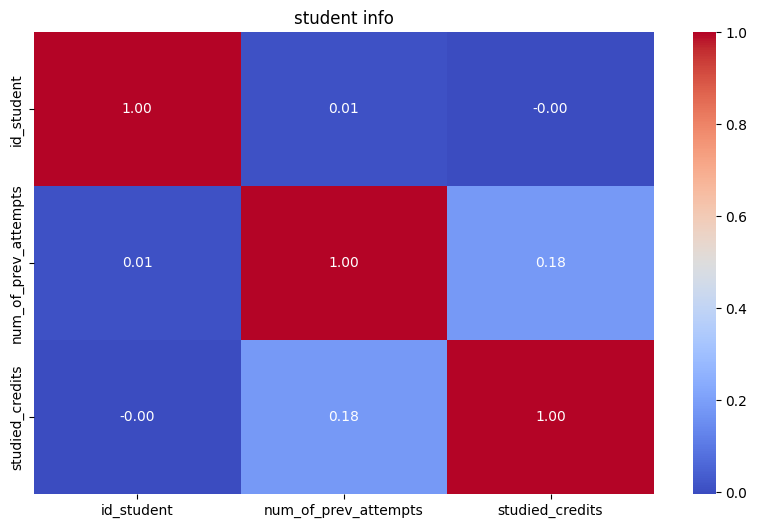

In [5]:
# Korelasi antara variabel numerik
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('student info')
plt.show()


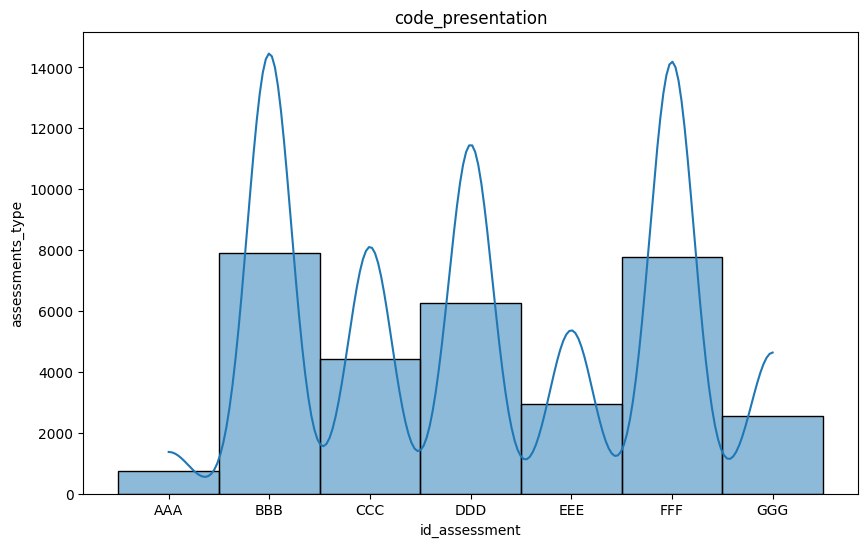

In [6]:
# Visualisasi distribusi data
plt.figure(figsize=(10, 6))
sns.histplot(df['code_module'], bins=20, kde=True)
plt.title('code_presentation')
plt.xlabel('id_assessment')
plt.ylabel('assessments_type')
plt.show()


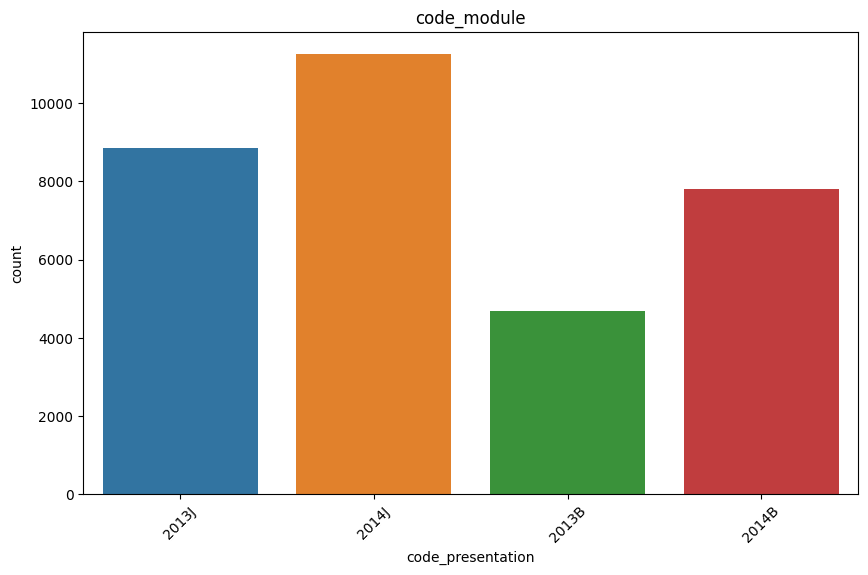

In [7]:
# Visualisasi data kategorikal
plt.figure(figsize=(10, 6))
sns.countplot(x='code_presentation', data=df)
plt.title('code_module')
plt.xticks(rotation=45)
plt.show()


Preprocessing

In [8]:
df['studied_credits'].fillna(df['studied_credits'].mean(), inplace=True)
df['studied_credits'].fillna(df['studied_credits'].mode()[0], inplace=True)
label_encoder = LabelEncoder()
df['studied_credits'] = label_encoder.fit_transform(df['studied_credits'])
scaler = StandardScaler()
df[['studied_credits', 'num_of_prev_attempts']] = scaler.fit_transform(df[['studied_credits', 'num_of_prev_attempts']])
X = df.drop('studied_credits', axis=1)  # Fitur
y = df['num_of_prev_attempts']  # Target

In [9]:
# Menampilkan 5 baris pertama data setelah preprocessing
print(df.head())

# Menampilkan informasi dasar tentang data setelah preprocessing
print(df.info())

  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   
3         AAA             2013J       31604      F     South East Region   
4         AAA             2013J       32885      F  West Midlands Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=             -0.340229   
1       HE Qualification   20-30%    35-55             -0.340229   
2  A Level or Equivalent   30-40%    35-55             -0.340229   
3  A Level or Equivalent   50-60%    35-55             -0.340229   
4     Lower Than A Level   50-60%     0-35             -0.340229   

   studied_credits disability final_result  
0         3.818184          N         Pass  
1        -0.517975          N         Pass  